###  End 2 End NLP Project
+ Emotion Detection in Text
+ Text Classifier

In [1]:
# Load EDA packages
import pandas as pd
import numpy as np

In [2]:
# Load Data Viz Pkgs
import matplotlib as plt
import seaborn as sns

In [3]:
# Load Text Cleaning Pkgs
import neattext.functions as nfx

In [4]:
# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [5]:
df = pd.read_csv("data/emotion_dataset_raw.csv")

In [6]:
df.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [7]:
df.shape

(34792, 2)

In [8]:
df.dtypes

Emotion    object
Text       object
dtype: object

In [9]:
df.isnull().sum()

Emotion    0
Text       0
dtype: int64

In [10]:
df['Emotion'].value_counts()

Emotion
joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
shame         146
Name: count, dtype: int64

<Axes: xlabel='Emotion'>

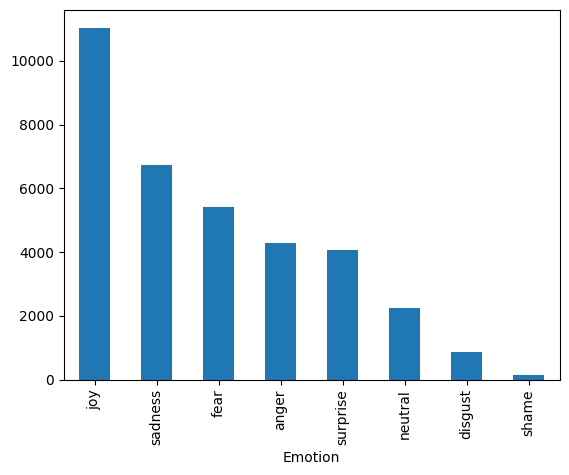

In [11]:
df['Emotion'].value_counts().plot(kind='bar')

<Axes: xlabel='count', ylabel='Emotion'>

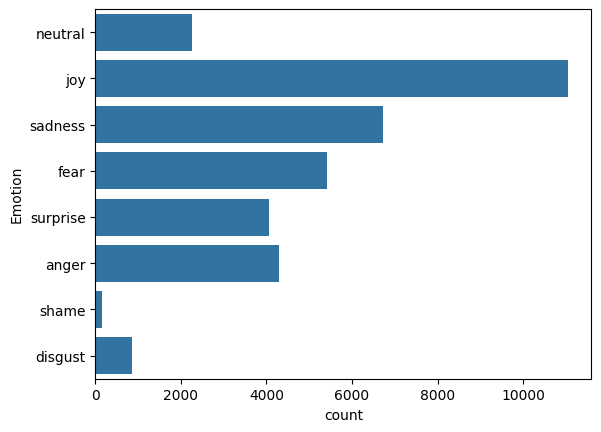

In [12]:
# Using seaborn to plot
sns.countplot(df['Emotion'])

In [13]:
dir('nfx')

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'removeprefix',
 'removesuffix',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'stri

In [14]:
# User Handles
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)

In [15]:
# Stopwords
df['Clean_Text'] = df['Text'].apply(nfx.remove_stopwords)

In [16]:
df

,Emotion,Text,Clean_Text
0,neutral,Why ?,?
1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL!!! MAN HATE FUNERALS...
3,joy,Such an eye ! The true hazel eye-and so brill...,eye ! true hazel eye-and brilliant ! Regular f...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,@Iluvmiasantos ugh babe.. hugggzzz u .! babe n...
...,...,...,...
34787,surprise,@MichelGW have you gift! Hope you like it! It'...,@MichelGW gift! Hope like it! hand wear ! It'l...
34788,joy,The world didnt give it to me..so the world MO...,world didnt me..so world DEFINITELY cnt away!!!
34789,anger,A man robbed me today .,man robbed today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...","Youu JEALOUSY, #Losing YOU..."


In [17]:
# Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['Emotion']

In [18]:
x_train, x_test, y_train, y_test = train_test_split(Xfeatures, ylabels, test_size=0.3, random_state=42)

In [19]:
# Build Pipeline
from sklearn.pipeline import Pipeline
#from transformers import pipeline

In [20]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()), ('lr', LogisticRegression())])

In [21]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

/home/ayobami/miniconda3/envs/jupyenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [22]:
# CHeck Accuracy
pipe_lr.score(x_test,y_test)

0.6224372485150412

In [23]:
# Make A Prediction
ex1 = "This book was so interestiing it made me glad"

In [24]:
pipe_lr.predict([ex1])

array(['joy'], dtype=object)

In [25]:
# Prediction Probability
pipe_lr.predict_proba([ex1])

array([[3.42025766e-02, 5.85801515e-02, 2.95554589e-02, 6.23602466e-01,
        8.03238719e-04, 2.33073525e-01, 3.82388986e-04, 1.98001943e-02]])

In [26]:
# To know the classes
pipe_lr.classes_

array(['anger', 'disgust', 'fear', 'joy', 'neutral', 'sadness', 'shame',
       'surprise'], dtype=object)

In [29]:
# Save Model and Pipeline
import joblib
pipeline_file = open("emotion_classifier_pipe_lr_25_November_2023.pkl", "wb")
joblib.dump(pipe_lr, pipeline_file)
pipeline_file.close()